In [1]:
using DataFrames
using CSV
using StatsBase
using Plots
using FreqTables
using StatsPlots
# using CategoricalArrays

In [2]:
data = CSV.read("C:\\Users\\andre\\Documents\\CC GENERAL.csv", DataFrame);
select!(data, Not([:CUST_ID]))
labels = names(data)
# lab = []
#for i in 1:length(labels)
#    push!(lab,"b." * labels[i])
#end
#-----------------------------------------------------

#b = ismissing.(data)
# gdf = groupby(b, [:MINIMUM_PAYMENTS])
# combine(gdf, :MINIMUM_PAYMENTS => count)

#-----------------------------------------------------

#for i in 1:length(labels)
#    b[:,i]=replace!(b[:,i], false => 0)
#    b[:,i]=replace!(b[:,i], true => 1)
#end

#-----------------------------------------------------

#for col in eachcol(b)
#    replace!(col,missing => 0)
#end
#-----------------------------------------------------
for i in 1:length(labels)
    println("\n")
    println(freqtable(ismissing.(data), labels[i]))
end



1-element Named Vector{Int64}
BALANCE  │ 
─────────┼─────
false    │ 8950


1-element Named Vector{Int64}
BALANCE_FREQUENCY  │ 
───────────────────┼─────
false              │ 8950


1-element Named Vector{Int64}
PURCHASES  │ 
───────────┼─────
false      │ 8950


1-element Named Vector{Int64}
ONEOFF_PURCHASES  │ 
──────────────────┼─────
false             │ 8950


1-element Named Vector{Int64}
INSTALLMENTS_PURCHASES  │ 
────────────────────────┼─────
false                   │ 8950


1-element Named Vector{Int64}
CASH_ADVANCE  │ 
──────────────┼─────
false         │ 8950


1-element Named Vector{Int64}
PURCHASES_FREQUENCY  │ 
─────────────────────┼─────
false                │ 8950


1-element Named Vector{Int64}
ONEOFF_PURCHASES_FREQUENCY  │ 
────────────────────────────┼─────
false                       │ 8950


1-element Named Vector{Int64}
PURCHASES_INSTALLMENTS_FREQUENCY  │ 
──────────────────────────────────┼─────
false                             │ 8950


1-element Named Vector{

In [3]:
# recode!(data[:,:MINIMUM_PAYMENTS], missing => mean(skipmissing(data[:,:MINIMUM_PAYMENTS])))
# dropmissing(data)
replace!(data.MINIMUM_PAYMENTS, missing => median(skipmissing(data[:,:MINIMUM_PAYMENTS])))
replace!(data.CREDIT_LIMIT, missing => median(skipmissing(data[:,:CREDIT_LIMIT])))
# data = dropmissing(data)
first(data, 10)

10×17 DataFrame
 Row │ BALANCE    BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS ⋯
     │ Float64    Float64            Float64    Float64           Float64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   40.9007           0.818182      95.4               0.0                ⋯
   2 │ 3202.47             0.909091       0.0               0.0
   3 │ 2495.15             1.0          773.17            773.17
   4 │ 1666.67             0.636364    1499.0            1499.0
   5 │  817.714            1.0           16.0              16.0                ⋯
   6 │ 1809.83             1.0         1333.28              0.0
   7 │  627.261            1.0         7091.01           6402.63
   8 │ 1823.65             1.0          436.2               0.0
   9 │ 1014.93             1.0          861.49            661.49               ⋯
  10 │  152.226            0.545455    1281.6            1281.6
                                                              13 columns omitted

In [4]:
data=data[1:length(data[:,1]),1:length(data[1,:])]
df=Matrix(data)
c=cor(df)

17×17 Matrix{Float64}:
  1.0         0.322412    0.181261   …   0.39792     -0.318959    0.0726923
  0.322412    1.0         0.133674       0.131181    -0.0950824   0.119776
  0.181261    0.133674    1.0            0.0957888    0.180379    0.0862882
  0.16435     0.104323    0.916845       0.0502563    0.132763    0.06415
  0.126469    0.124292    0.679896       0.134019     0.182569    0.0861429
  0.496692    0.099388   -0.0514742  …   0.140747    -0.152935   -0.0683124
 -0.0779437   0.229715    0.393017       0.00615381   0.305802    0.0615056
  0.0731661   0.202415    0.49843       -0.0273113    0.157531    0.0824663
 -0.0631858   0.176079    0.315567       0.0320555    0.250087    0.0732754
  0.449218    0.191873   -0.120143       0.100616    -0.249773   -0.133372
  0.385152    0.141555   -0.0671753  …   0.111251    -0.169784   -0.0434206
  0.154338    0.189626    0.689561       0.0987224    0.162066    0.121874
  0.531296    0.0959313   0.356977       0.126765     0.0556949   0.13

In [58]:
heatmap(c, xticks=(1:17, labels), yticks=(1:17, labels),
    fill_z=c, aspect_ratio=:equal,size=(1000,800),c = :greens, xrotation = 90);

fontsize = 7
nrow, ncol = size(c)
ann = [(i,j, text(round(c[i,j], digits=2), fontsize, :white, :center))
            for i in 1:nrow for j in 1:ncol];
annotate!(ann, linecolor=:white);


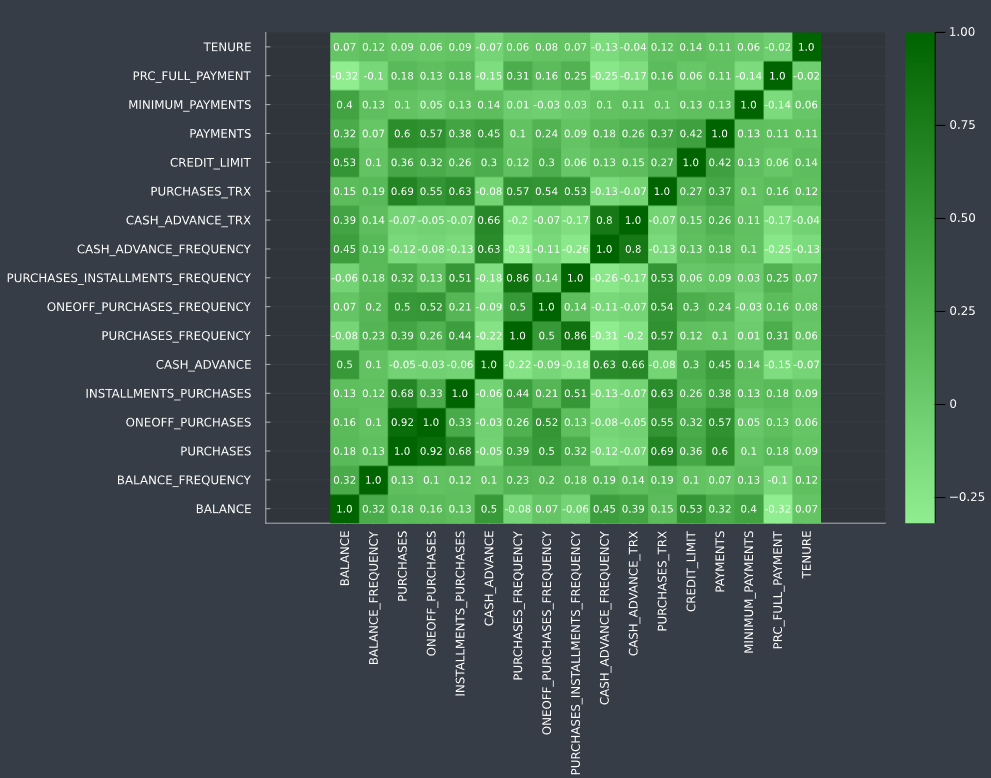

In [57]:
using Images
ruta2=joinpath(pwd(),"C:\\Users\\andre\\Documents\\c1.png");
image2=load(ruta2)

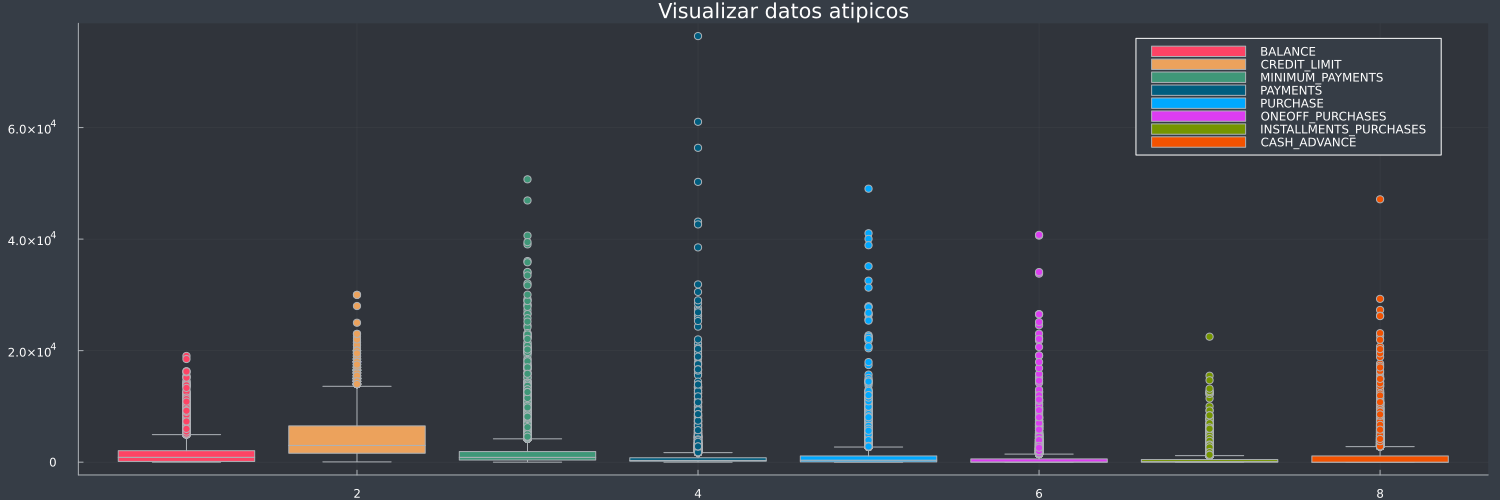

In [54]:
boxplot([data[:,1] data[:,13] data[:,14] data[:,15] data[:,3] data[:,4] data[:,5] data[:,6]], 
    label=permutedims(["BALANCE", "CREDIT_LIMIT", "MINIMUM_PAYMENTS", "PAYMENTS","PURCHASE", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE"]),size=(1500,500), 
    title= "Visualizar datos atipicos")

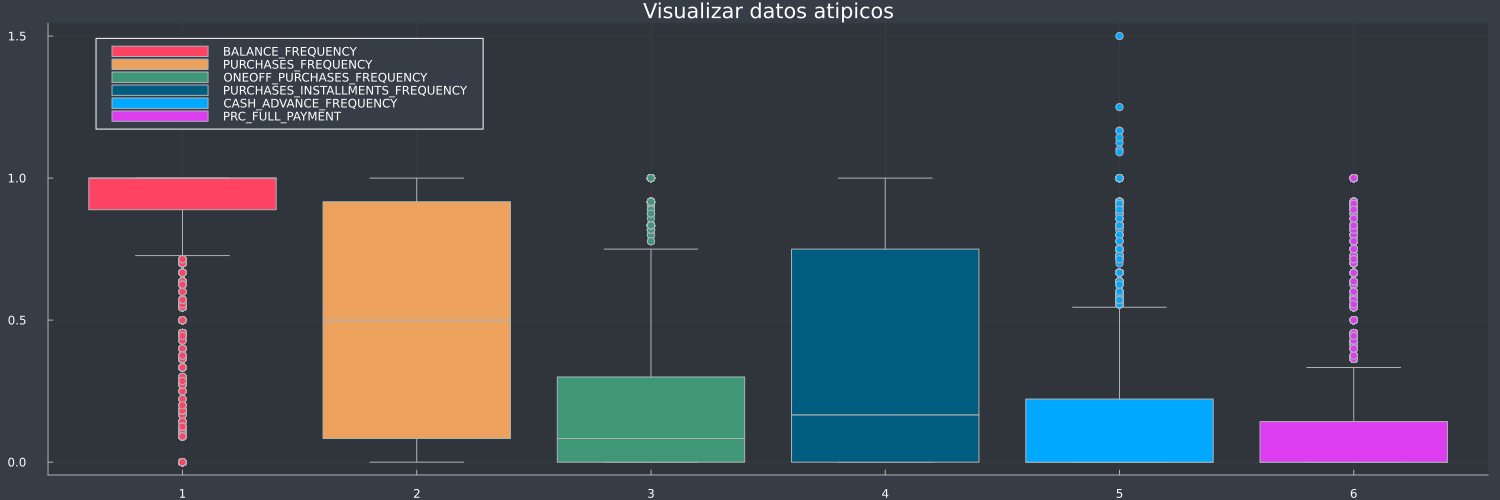

In [53]:
p2=boxplot([data[:,2] data[:,7] data[:,8] data[:,9] data[:,10] data[:,16]], 
    label=permutedims(["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", 
         "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]),size=(1500,500), title= "Visualizar datos atipicos", legend=:topleft)

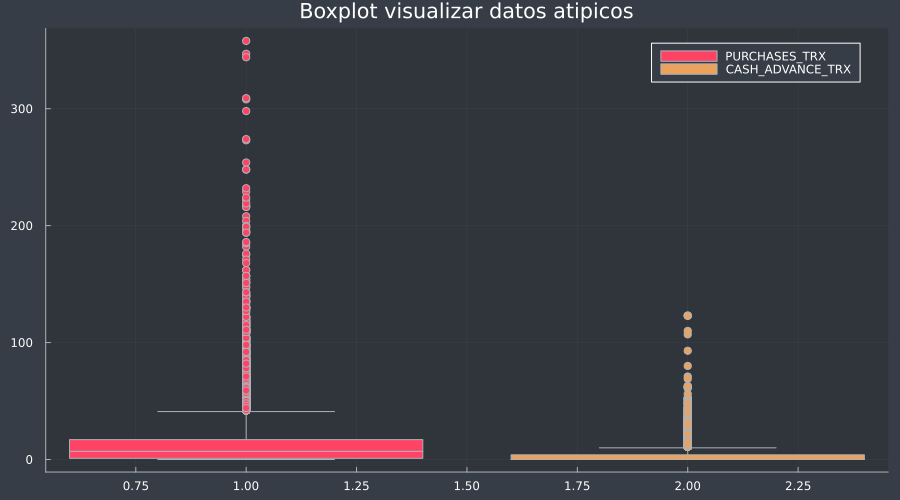

In [52]:
boxplot([data[:,12] data[:,11]], 
    label=permutedims(["PURCHASES_TRX", "CASH_ADVANCE_TRX"]),size=(900,500), title= "Boxplot visualizar datos atipicos")

In [9]:
clus1=select(data, :"BALANCE", :"PURCHASES", :"ONEOFF_PURCHASES", :"INSTALLMENTS_PURCHASES", :"CASH_ADVANCE", :"CREDIT_LIMIT",
        :"PAYMENTS", :"MINIMUM_PAYMENTS");

In [10]:
c1=zeros(length(data[:,1]),8)
c2=zeros(length(data[:,1]),8)
c3=zeros(length(data[:,1]),8)
c4=zeros(length(data[:,1]),8)
c5=zeros(length(data[:,1]),8)
c6=zeros(length(data[:,1]),8)
#--------------------------------------------------------------------
for i in 1:8 
    c1[:,i]=Float64.(((clus1[:,i].>0.0) .& (clus1[:,i].<=500.0)))
end

for col in eachcol(c1)
    replace!(col, 1.0 => 1.0)
end
#--------------------------------------------------------------------
for i in 1:8 
    c2[:,i]=Float64.(((clus1[:,i].>500.0) .& (clus1[:,i].<=1000.0)))
end

for col in eachcol(c2)
    replace!(col, 1.0 => 2.0)
end
#--------------------------------------------------------------------
for i in 1:8 
    c3[:,i]=Float64.(((clus1[:,i].>1000.0) .& (clus1[:,i].<=3000.0)))
end

for col in eachcol(c3)
    replace!(col, 1.0 => 3.0)
end
#-------------------------------------------------------------------
for i in 1:8 
    c4[:,i]=Float64.(((clus1[:,i].>3000.0) .& (clus1[:,i].<=5000.0)))
end

for col in eachcol(c4)
    replace!(col, 1.0 => 4.0)
end
#-------------------------------------------------------------------
for i in 1:8 
    c5[:,i]=Float64.(((clus1[:,i].>5000.0) .& (clus1[:,i].<=10000.0)))
end

for col in eachcol(c5)
    replace!(col, 1.0 => 5.0)
end
#-------------------------------------------------------------------
for i in 1:8 
    c6[:,i]=Float64.(((clus1[:,i].>10000.0)))
end

for col in eachcol(c6)
    replace!(col, 1.0 => 6.0)
end
ct= c1+c2+c3+c4+c5+c6;

In [11]:
columns2=["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", 
         "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]
clus2 = select(data, :"BALANCE_FREQUENCY", :"PURCHASES_FREQUENCY", :"ONEOFF_PURCHASES_FREQUENCY", :"PURCHASES_INSTALLMENTS_FREQUENCY", 
         :"CASH_ADVANCE_FREQUENCY", :"PRC_FULL_PAYMENT");

In [12]:
d1=zeros(length(data[:,1]),6)
d2=zeros(length(data[:,1]),6)
d3=zeros(length(data[:,1]),6)
d4=zeros(length(data[:,1]),6)
d5=zeros(length(data[:,1]),6)
d6=zeros(length(data[:,1]),6)
d7=zeros(length(data[:,1]),6)
d8=zeros(length(data[:,1]),6)
d9=zeros(length(data[:,1]),6)
d10=zeros(length(data[:,1]),6)

#--------------------------------------------------------------------
for i in 1:6 
    d1[:,i]=Float64.(((clus2[:,i].>0.0) .& (clus2[:,i].<=0.1)))
end

for col in eachcol(d1)
    replace!(col, 1.0 => 1.0)
end
#--------------------------------------------------------------------
for i in 1:6 
    d2[:,i]=Float64.(((clus2[:,i].>0.1) .& (clus2[:,i].<=0.2)))
end

for col in eachcol(d2)
    replace!(col, 1.0 => 2.0)
end
#--------------------------------------------------------------------
for i in 1:6 
    d3[:,i]=Float64.(((clus2[:,i].>0.2) .& (clus2[:,i].<=0.3)))
end

for col in eachcol(d3)
    replace!(col, 1.0 => 3.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d4[:,i]=Float64.(((clus2[:,i].>0.3) .& (clus2[:,i].<=0.4)))
end

for col in eachcol(d4)
    replace!(col, 1.0 => 4.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d5[:,i]=Float64.(((clus2[:,i].>0.4) .& (clus2[:,i].<=0.5)))
end

for col in eachcol(d5)
    replace!(col, 1.0 => 5.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d6[:,i]=Float64.(((clus2[:,i].>0.5) .& (clus2[:,i].<=0.6)))
end

for col in eachcol(d6)
    replace!(col, 1.0 => 6.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d7[:,i]=Float64.(((clus2[:,i].>0.6) .& (clus2[:,i].<=0.7)))
end

for col in eachcol(d7)
    replace!(col, 1.0 => 7.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d8[:,i]=Float64.(((clus2[:,i].>0.7) .& (clus2[:,i].<=0.8)))
end

for col in eachcol(d8)
    replace!(col, 1.0 => 8.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d9[:,i]=Float64.(((clus2[:,i].>0.8) .& (clus2[:,i].<=0.9)))
end

for col in eachcol(d9)
    replace!(col, 1.0 => 9.0)
end
#-------------------------------------------------------------------
for i in 1:6 
    d10[:,i]=Float64.(((clus2[:,i].>0.9) .& (clus2[:,i].<=1.0)))
end

for col in eachcol(d10)
    replace!(col, 1.0 => 10.0)
end
dt=d1+d2+d3+d4+d5+d6+d7+d8+d9+d10;

In [13]:
clus3=select(data, :"PURCHASES_TRX",:"CASH_ADVANCE_TRX");

c11=zeros(length(data[:,1]),2)
c21=zeros(length(data[:,1]),2)
c31=zeros(length(data[:,1]),2)
c41=zeros(length(data[:,1]),2)
c51=zeros(length(data[:,1]),2)
c61=zeros(length(data[:,1]),2)
c71=zeros(length(data[:,1]),2)
c81=zeros(length(data[:,1]),2)
#--------------------------------------------------------------------
for i in 1:2 
    c11[:,i]=Float64.(((clus3[:,i].>0.0) .& (clus3[:,i].<=5.0)))
end

for col in eachcol(c11)
    replace!(col, 1.0 => 1.0)
end
#--------------------------------------------------------------------
for i in 1:2 
    c21[:,i]=Float64.(((clus3[:,i].>5.0) .& (clus3[:,i].<=10.0)))
end

for col in eachcol(c21)
    replace!(col, 1.0 => 2.0)
end
#--------------------------------------------------------------------
for i in 1:2 
    c31[:,i]=Float64.(((clus3[:,i].>10.0) .& (clus3[:,i].<=15.0)))
end

for col in eachcol(c31)
    replace!(col, 1.0 => 3.0)
end
#-------------------------------------------------------------------
for i in 1:2 
    c41[:,i]=Float64.(((clus3[:,i].>15.0) .& (clus3[:,i].<=20.0)))
end

for col in eachcol(c41)
    replace!(col, 1.0 => 4.0)
end
#-------------------------------------------------------------------
for i in 1:2
    c51[:,i]=Float64.(((clus3[:,i].>20.0) .& (clus3[:,i].<=30.0)))
end

for col in eachcol(c51)
    replace!(col, 1.0 => 5.0)
end
#-------------------------------------------------------------------
for i in 1:2 
    c61[:,i]=Float64.(((clus3[:,i].>30.0) .& (clus3[:,i].<=50.0)))
end

for col in eachcol(c61)
    replace!(col, 1.0 => 6.0)
end
#-------------------------------------------------------------------
for i in 1:2 
    c71[:,i]=Float64.(((clus3[:,i].>50.0) .& (clus3[:,i].<=100.0)))
end

for col in eachcol(c71)
    replace!(col, 1.0 => 7.0)
end
#-------------------------------------------------------------------
for i in 1:2 
    c81[:,i]=Float64.(((clus3[:,i].>100.0)))
end

for col in eachcol(c81)
    replace!(col, 1.0 => 8.0)
end

et = c11+c21+c31+c41+c51+c61+c71+c81;

In [14]:
tenure=Matrix(data[:,17]')'
res = hcat(ct,dt,et,tenure)

8950×17 Matrix{Float64}:
 1.0  1.0  0.0  1.0  0.0  2.0  1.0  1.0  …   1.0  0.0   0.0  1.0  0.0  12.0
 4.0  0.0  0.0  0.0  5.0  5.0  4.0  3.0      0.0  3.0   3.0  0.0  1.0  12.0
 3.0  2.0  2.0  0.0  0.0  5.0  2.0  2.0      0.0  0.0   0.0  3.0  0.0  12.0
 3.0  3.0  3.0  0.0  1.0  5.0  0.0  1.0      0.0  1.0   0.0  1.0  1.0  12.0
 2.0  1.0  1.0  0.0  0.0  3.0  2.0  1.0      0.0  0.0   0.0  1.0  0.0  12.0
 3.0  3.0  0.0  3.0  0.0  3.0  3.0  3.0  …   6.0  0.0   0.0  2.0  0.0  12.0
 2.0  5.0  5.0  2.0  0.0  6.0  5.0  1.0     10.0  0.0  10.0  7.0  0.0  12.0
 3.0  1.0  0.0  1.0  0.0  3.0  2.0  2.0     10.0  0.0   0.0  3.0  0.0  12.0
 3.0  2.0  2.0  1.0  0.0  5.0  2.0  1.0      3.0  0.0   0.0  1.0  0.0  12.0
 1.0  3.0  3.0  0.0  0.0  6.0  3.0  1.0      0.0  0.0   0.0  1.0  0.0  12.0
 3.0  2.0  0.0  2.0  0.0  3.0  3.0  3.0  …  10.0  0.0   0.0  3.0  0.0  12.0
 2.0  3.0  3.0  0.0  0.0  3.0  2.0  1.0      0.0  0.0   0.0  2.0  0.0  12.0
 3.0  4.0  3.0  2.0  0.0  3.0  2.0  1.0     10.0  0.0   3.0  5.

In [45]:
using Clustering
R = kmeans(res', 6; maxiter= 50, display=:iter);
A = assignments(R);
cluster=hcat(data, A);
rename!(cluster,:x1 => :cluster)
first(cluster, 10);

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.161390e+05
      1       3.201377e+05      -9.600134e+04 |        6
      2       3.016547e+05      -1.848291e+04 |        6
      3       2.935789e+05      -8.075867e+03 |        6
      4       2.921745e+05      -1.404356e+03 |        6
      5       2.915612e+05      -6.133359e+02 |        6
      6       2.905720e+05      -9.891717e+02 |        6
      7       2.888881e+05      -1.683890e+03 |        6
      8       2.861145e+05      -2.773650e+03 |        6
      9       2.835833e+05      -2.531214e+03 |        6
     10       2.812643e+05      -2.318961e+03 |        6
     11       2.794211e+05      -1.843211e+03 |        6
     12       2.779466e+05      -1.474479e+03 |        6
     13       2.760787e+05      -1.867922e+03 |        6
     14       2.750570e+05      -1.021708e+03 |        6
     15       2.747524e+05      -3.045996e+02 |        

In [48]:
countt= DataFrame(Cluster= collect(1:6), Cantidad = counts(A))

6×2 DataFrame
 Row │ Cluster  Cantidad 
     │ Int64    Int64    
─────┼───────────────────
   1 │       1      1749
   2 │       2      1188
   3 │       3      2408
   4 │       4       953
   5 │       5      1725
   6 │       6       927

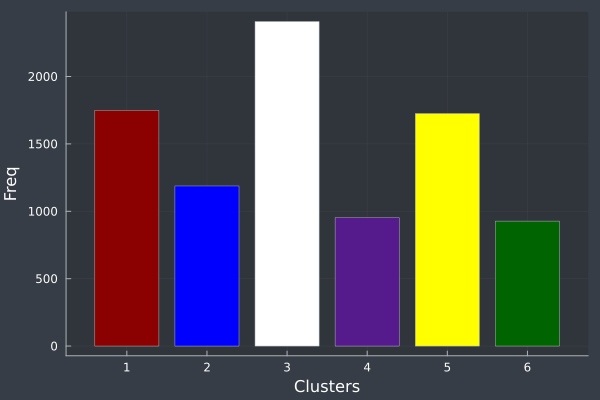

In [46]:
bar(1:6, counts(A), width=0.5,  fill = [:red4, :blue1, :white, :purple4, :yellow1,:darkgreen] , show=true, legend = false, xlabel = "Clusters", ylabel="Freq")

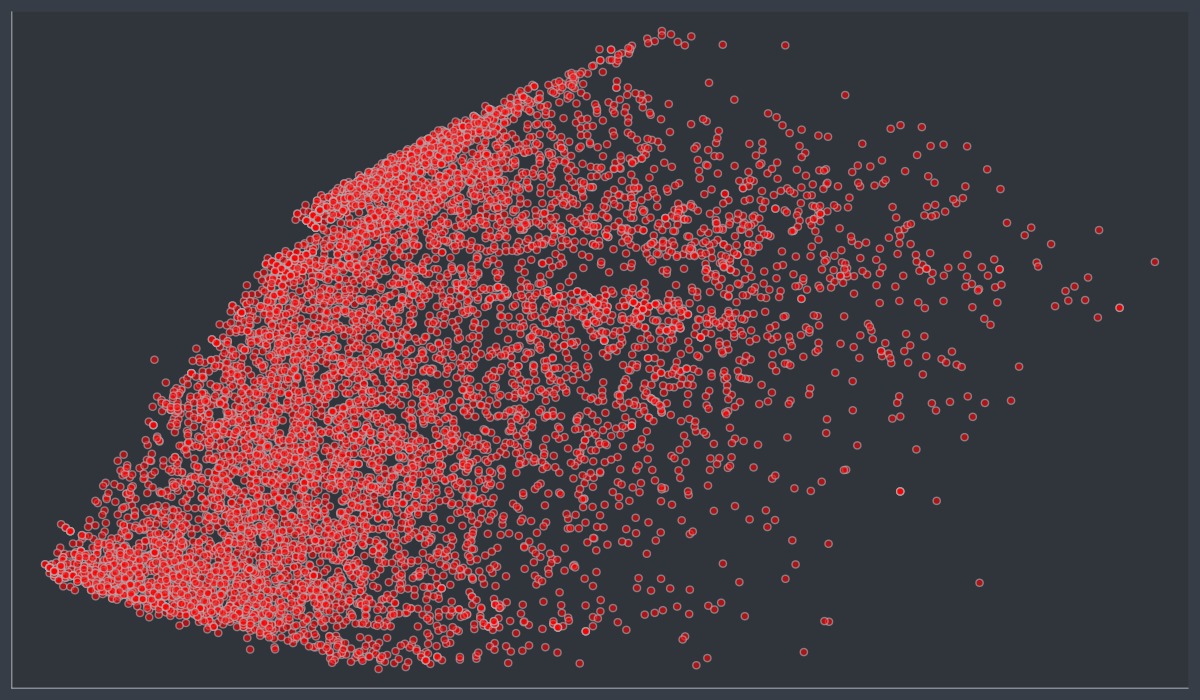

In [35]:
using Plots; theme(:dark)
using MultivariateStats
## PCA model:
M = fit(PCA, res; pratio=1, maxoutdim=2);
typeof(M)
reduct=projection(M)
newm=hcat(reduct,A)
x,y = newm[:,1] , newm[:,2]
scatter(x,y,size=(1200,700), dpi = 10000, alpha = 0.6,  color = :red,ticks = false, legend = false)

In [49]:
using MultivariateStats
## PCA model:
M = fit(PCA, res; pratio=1, maxoutdim=2);
typeof(M)
reduct=projection(M)
newm=hcat(reduct,A)
x,y = newm[:,1] , newm[:,2]
labels2 = newm[:,3]
labels2 = string.(labels2)
scatter(x,y,size=(1200,700), group = labels2, dpi = 10000, alpha = 1.0, 
    color = [:red4 :blue1 :white :purple4 :yellow1 :darkgreen],
    ticks = false, markershape = [:hex :circle :diamond :pentagon :rect :ltriangle],
    title = "PLOT", titlefontsize = 8)